In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
data = pd.read_csv("travel_times.csv")

In [8]:
data.head()

,x,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
0,1,01-06-2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,2,01-06-2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,3,01-04-2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
3,4,01-04-2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
4,5,01-03-2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN


In [9]:
print(data.columns)

Index(['x', 'Date', 'StartTime', 'DayOfWeek', 'GoingTo', 'Distance',
       'MaxSpeed', 'AvgSpeed', 'AvgMovingSpeed', 'FuelEconomy', 'TotalTime',
       'MovingTime', 'Take407All', 'Comments'],
      dtype='object')


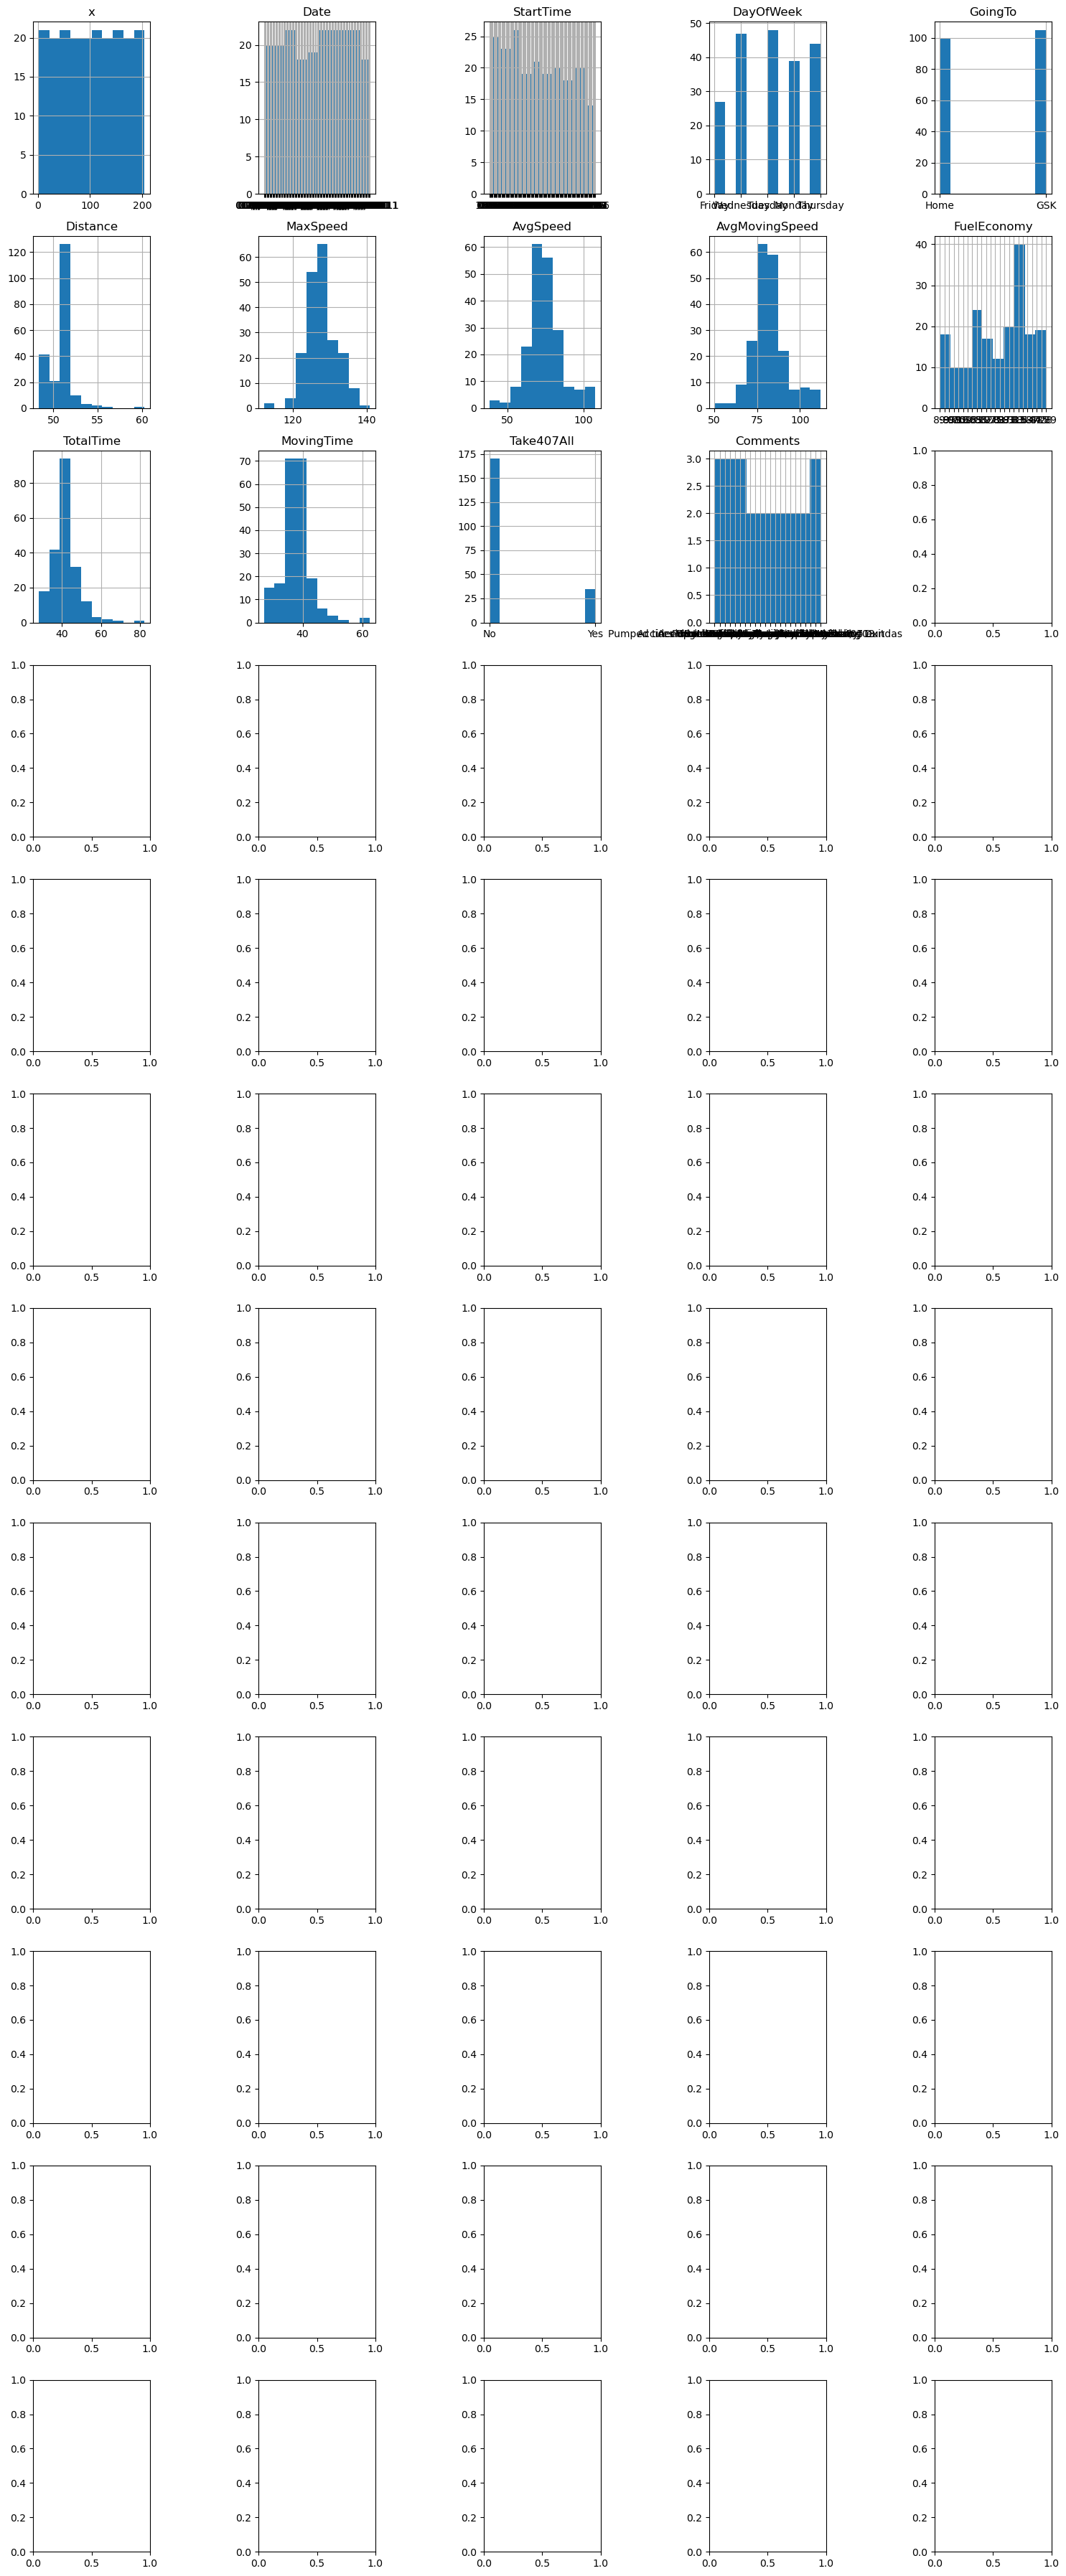

In [10]:
plotPerColumnDistribution(data, 12, 5)

In [11]:
def plotPerColumnDistribution(data, rows=5, cols=5):
    num_features = len(data.columns)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

    for i, column in enumerate(data.columns):
        ax = axes[i // cols, i % cols]
        data[column].hist(ax=ax)
        ax.set_title(column)
    plt.tight_layout()
    plt.show()

In [12]:
def plotCorrelationMatrix(df, figsize=(8, 7)):
    plt.figure(figsize=figsize)
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

In [13]:
data['TotalTimeClass'] = pd.cut(data['TotalTime'], bins=3, labels=['low', 'medium', 'high'])

In [14]:
X = data[['x', 'Date', 'StartTime', 'DayOfWeek', 'GoingTo', 'Distance', 'MaxSpeed', 'AvgSpeed', 'AvgMovingSpeed', 'FuelEconomy', 'MovingTime']]
y = data['TotalTimeClass']

In [15]:
X = pd.get_dummies(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_pred = model.predict(X_test)

In [19]:
# Evaluation metrics for classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [20]:
print("Accuracy:", accuracy)

Accuracy: 0.9512195121951219


In [21]:
print("Precision:", precision)

Precision: 0.9539295392953928


In [22]:
print("Recall:", recall)

Recall: 0.9512195121951219


In [27]:
print("F1 Score:", f1)

F1 Score: 0.9183973017707131
